# Hyperbolic plane $\mathbb{H}^2$

First we set up the notebook to display mathematical objects using LaTeX formatting:

In [1]:
%display latex

We declare $\mathbb{H}^2$ as a 2-dimensional differentiable manifold:

In [2]:
H2 = Manifold(2, 'H2', latex_name=r'\mathbb{H}^2', start_index=1)
print H2
H2

2-dimensional manifold 'H2'


2-dimensional manifold 'H2'

We shall introduce charts on $\mathbb{H}^2$ that are related to various models of the hyperbolic plane as submanifolds of $\mathbb{R}^3$. Therefore, we start by declaring $\mathbb{R}^3$ as a 3-dimensional manifold equiped with a global chart: the chart of Cartesian coordinates $(X,Y,Z)$:

In [3]:
R3 = Manifold(3, 'R3', latex_name=r'\mathbb{R}^3', start_index=1)
X3.<X,Y,Z> = R3.chart()
X3

chart (R3, (X, Y, Z))

## Hyperboloid model

The first chart we introduce is related to the **hyperboloid model of $\mathbb{H}^2$**, namely to the representation of $\mathbb{H}^2$ as the upper sheet ($Z>0$) of the hyperboloid of two sheets defined in $\mathbb{R}^3$ by the equation $X^2 + Y^2 - Z^2 = -1$:

In [4]:
X_hyp.<X,Y> = H2.chart()
X_hyp

chart (H2, (X, Y))

The corresponding embedding of $\mathbb{H}^2$ in $\mathbb{R}^3$ is

In [5]:
Phi1 = H2.diff_mapping(R3, [X, Y, sqrt(1+X^2+Y^2)], name='Phi_1', latex_name=r'\Phi_1')
Phi1.display()

Phi_1: H2 --> R3
   (X, Y) |--> (X, Y, Z) = (X, Y, sqrt(X^2 + Y^2 + 1))

By plotting the chart $\left(\mathbb{H}^2,(X,Y)\right)$ in terms of the Cartesian coordinates of $\mathbb{R}^3$, we get a graphical view of $\Phi_1(\mathbb{H}^2)$:

In [6]:
show(X_hyp.plot(X3, mapping=Phi1, nb_values=15, color='blue'), aspect_ratio=1)

Graphics3d Object

A second chart is obtained from the polar coordinates $(r,\varphi)$ associated with $(X,Y)$. Contrary to $(X,Y)$, the polar chart is not defined on the whole $\mathbb{H}^2$, but on the complement $U$ of the segment $\{Y=0, x\geq 0\}$: 

In [7]:
U = H2.open_subset('U', coord_def={X_hyp: (Y!=0, X<0)})
print U

open subset 'U' of the 2-dimensional manifold 'H2'


Note that (y!=0, x<0) stands for $y\not=0$ OR $x<0$; the condition $y\not=0$ AND $x<0$ would have been written [y!=0, x<0] instead.

In [8]:
X_pol.<r,ph> = U.chart(r'r:(0,+oo) ph:(0,2*pi):\varphi')
X_pol

chart (U, (r, ph))

In [9]:
X_pol.coord_range()

r: (0, +oo); ph: (0, 2*pi)

We specify the transition map between the charts $\left(U,(r,\varphi)\right)$ and $\left(\mathbb{H}^2,(X,Y)\right)$ as $X=r\cos\varphi$, $Y=r\sin\varphi$:

In [10]:
pol_to_hyp = X_pol.transition_map(X_hyp, [r*cos(ph), r*sin(ph)])
pol_to_hyp

coordinate change from chart (U, (r, ph)) to chart (U, (X, Y))

In [11]:
pol_to_hyp.set_inverse(sqrt(X^2+Y^2), atan2(Y, X)) 

Check of the inverse coordinate transformation:
   r == r
   ph == arctan2(r*sin(ph), r*cos(ph))
   X == X
   Y == Y


The restriction of the embedding $\Phi_1$ to $U$ has then two coordinate expressions:

In [12]:
Phi1.restrict(U).display()

Phi_1: U --> R3
   (X, Y) |--> (X, Y, Z) = (X, Y, sqrt(X^2 + Y^2 + 1))
   (r, ph) |--> (X, Y, Z) = (r*cos(ph), r*sin(ph), sqrt(r^2 + 1))

In [13]:
show(X_pol.plot(X3, mapping=Phi1.restrict(U), nb_values=15, color='blue'), 
     aspect_ratio=1)

Graphics3d Object

In [14]:
Phi1._coord_expression

{(chart (H2, (X, Y)),
  chart (R3, (X, Y, Z))): functions (X, Y, sqrt(X^2 + Y^2 + 1)) on the chart (H2, (X, Y))}

## Metric and curvature

The metric on $\mathbb{H}^2$ is that induced by the Minkowksy metric on $\mathbb{R}^3$: 
$$ \eta = \mathrm{d}X\otimes\mathrm{d}X + \mathrm{d}Y\otimes\mathrm{d}Y
  - \mathrm{d}Z\otimes\mathrm{d}Z $$

In [15]:
eta = R3.lorentz_metric('eta', latex_name=r'\eta')
eta[1,1] = 1 ; eta[2,2] = 1 ; eta[3,3] = -1
eta.display()

eta = dX*dX + dY*dY - dZ*dZ

In [16]:
g = H2.riemann_metric('g')
g.set( Phi1.pullback(eta) )
g.display() 

g = (Y^2 + 1)/(X^2 + Y^2 + 1) dX*dX - X*Y/(X^2 + Y^2 + 1) dX*dY - X*Y/(X^2 + Y^2 + 1) dY*dX + (X^2 + 1)/(X^2 + Y^2 + 1) dY*dY

The expression of the metric tensor in terms of the polar coordinates is

In [17]:
g.display(X_pol.frame(), X_pol)

g = 1/(r^2 + 1) dr*dr + r^2 dph*dph

The Riemann curvature tensor associated with $g$ is

In [18]:
Riem = g.riemann()
print Riem

tensor field 'Riem(g)' of type (1,3) on the 2-dimensional manifold 'H2'


In [19]:
Riem.display(X_pol.frame(), X_pol)

Riem(g) = -r^2 d/dr*dph*dr*dph + r^2 d/dr*dph*dph*dr + 1/(r^2 + 1) d/dph*dr*dr*dph - 1/(r^2 + 1) d/dph*dr*dph*dr

The Ricci tensor and the Ricci scalar:

In [20]:
Ric = g.ricci()
print Ric

field of symmetric bilinear forms 'Ric(g)' on the 2-dimensional manifold 'H2'


In [21]:
Ric.display(X_pol.frame(), X_pol)

Ric(g) = -1/(r^2 + 1) dr*dr - r^2 dph*dph

In [22]:
Rscal = g.ricci_scalar()
print Rscal

scalar field 'r(g)' on the 2-dimensional manifold 'H2'


In [23]:
Rscal.display()

r(g): H2 --> R
   (X, Y) |--> -2
on U: (r, ph) |--> -2

Hence we recover the fact that $(\mathbb{H}^2,g)$ is a space of **constant negative curvature**.

In dimension 2, the Riemann curvature tensor is entirely determined by the Ricci scalar $R$ according to

$$R^i_{\ \, jlk} = \frac{R}{2} \left( \delta^i_{\ \, k} g_{jl} - \delta^i_{\ \, l} g_{jk} \right)$$

Let us check this formula here, under the form $R^i_{\ \, jlk} = -R g_{j[k} \delta^i_{\ \, l]}$:

In [24]:
delta = H2.tangent_identity_field()
Riem == - Rscal*(g*delta).antisymmetrize(2,3)  # 2,3 = last positions of the type-(1,3) tensor g*delta 

True

Similarly the relation $\mathrm{Ric} = (R/2)\; g$ must hold:

In [25]:
Ric == (Rscal/2)*g

True

## Poincaré disk model

The Poincaré disk model of $\mathbb{H}^2$ is obtained by stereographic projection from the point $S=(0,0,-1)$ of the hyperboloid model to the plane $Z=0$. The radial coordinate $R$ of the image of a point of polar coordinate $(r,\varphi)$ is
$$ R = \frac{r}{1+\sqrt{1+r^2}}.$$
Hence we define the Poincaré disk chart on $\mathbb{H}^2$ by

In [26]:
X_Pdisk.<R,ph> = U.chart(r'R:(0,1) ph:(0,2*pi):\varphi')
X_Pdisk

chart (U, (R, ph))

In [27]:
X_Pdisk.coord_range()

R: (0, 1); ph: (0, 2*pi)

and relate it to the hyperboloid polar chart by

In [28]:
pol_to_Pdisk = X_pol.transition_map(X_Pdisk, [r/(1+sqrt(1+r^2)), ph])
pol_to_Pdisk

coordinate change from chart (U, (r, ph)) to chart (U, (R, ph))

In [29]:
pol_to_Pdisk.set_inverse(2*R/(1-R^2), ph)

Check of the inverse coordinate transformation:
   r == r
   ph == ph
   R == R
   ph == ph


A view of the Poincaré disk chart via the embedding $\Phi_1$:

In [30]:
show(X_Pdisk.plot(X3, mapping=Phi1.restrict(U), ranges={R: (0,0.9)}, color='blue',
                  nb_values=15), aspect_ratio=1)

Graphics3d Object

The expression of the metric tensor in terms of coordinates $(R,\varphi)$:

In [31]:
g.display(X_Pdisk.frame(), X_Pdisk)

g = 4/(R^4 - 2*R^2 + 1) dR*dR + 4*R^2/(R^4 - 2*R^2 + 1) dph*dph

### Cartesian coordinates on the Poincaré disk

Let us introduce Cartesian coordinates $(u,v)$ on the Poincaré disk; since the latter has a unit radius, this amounts to define the following chart on $\mathbb{H}^2$:

In [32]:
X_Pdisk_cart.<u,v> = H2.chart('u:(-1,1) v:(-1,1)')
X_Pdisk_cart.add_restrictions(u^2+v^2 < 1)
X_Pdisk_cart

chart (H2, (u, v))

On $U$, the Cartesian coordinates $(u,v)$ are related to the polar coordinates $(R,\varphi)$ by the standard formulas:

In [33]:
Pdisk_to_Pdisk_cart = X_Pdisk.transition_map(X_Pdisk_cart, [R*cos(ph), R*sin(ph)])
Pdisk_to_Pdisk_cart

coordinate change from chart (U, (R, ph)) to chart (U, (u, v))

In [34]:
Pdisk_to_Pdisk_cart(R,ph)

(R*cos(ph), R*sin(ph))

In [35]:
Pdisk_to_Pdisk_cart.set_inverse(sqrt(u^2+v^2), atan2(v, u)) 

Check of the inverse coordinate transformation:
   R == R
   ph == arctan2(R*sin(ph), R*cos(ph))
   u == u
   v == v


The embedding of $\mathbb{H}^2$ in $\mathbb{R}^3$ associated with the Poincaré disk model is naturally defined as

In [36]:
Phi2 = H2.diff_mapping(R3, {(X_Pdisk_cart, X3): [u, v, 0]},
                       name='Phi_2', latex_name=r'\Phi_2')
Phi2.display()

Phi_2: H2 --> R3
   (u, v) |--> (X, Y, Z) = (u, v, 0)

Let us use it to draw the Poincaré disk in $\mathbb{R}^3$:

In [37]:
graph_disk_uv = X_Pdisk_cart.plot(X3, mapping=Phi2, nb_values=15)
show(graph_disk_uv)

Graphics3d Object

In [38]:
graph_disk = X_Pdisk.plot(X3, mapping=Phi2.restrict(U), nb_values=15)
show(graph_disk)

Graphics3d Object

On $U$, the change of coordinates $(r,\varphi) \rightarrow (u,v)$ is obtained by combining the changes $(r,\varphi) \rightarrow (R,\varphi)$ and $(R,\varphi) \rightarrow (u,v)$:

In [39]:
pol_to_Pdisk_cart = Pdisk_to_Pdisk_cart * pol_to_Pdisk
pol_to_Pdisk_cart

coordinate change from chart (U, (r, ph)) to chart (U, (u, v))

In [40]:
pol_to_Pdisk_cart(r,ph)

(r*cos(ph)/(sqrt(r^2 + 1) + 1), r*sin(ph)/(sqrt(r^2 + 1) + 1))

Still on $U$, the change of coordinates $(X,Y) \rightarrow (u,v)$ is obtained by combining the changes $(X,Y) \rightarrow (r,\varphi)$ with $(r,\varphi) \rightarrow (u,v)$:

In [41]:
hyp_to_Pdisk_cart_U = pol_to_Pdisk_cart * pol_to_hyp.inverse()
hyp_to_Pdisk_cart_U

coordinate change from chart (U, (X, Y)) to chart (U, (u, v))

In [42]:
hyp_to_Pdisk_cart_U(X,Y)

(X/(sqrt(X^2 + Y^2 + 1) + 1), Y/(sqrt(X^2 + Y^2 + 1) + 1))

We use the above expression to extend the change of coordinates $(X,Y) \rightarrow (u,v)$ from $U$ to the whole manifold $\mathbb{H}^2$:

In [43]:
hyp_to_Pdisk_cart = X_hyp.transition_map(X_Pdisk_cart, hyp_to_Pdisk_cart_U(X,Y))
hyp_to_Pdisk_cart

coordinate change from chart (H2, (X, Y)) to chart (H2, (u, v))

In [44]:
hyp_to_Pdisk_cart(X,Y)

(X/(sqrt(X^2 + Y^2 + 1) + 1), Y/(sqrt(X^2 + Y^2 + 1) + 1))

In [45]:
hyp_to_Pdisk_cart.set_inverse(2*u/(1-u^2-v^2), 2*v/(1-u^2-v^2))

Check of the inverse coordinate transformation:
   X == X
   Y == Y
   u == -2*u*abs(u^2 + v^2 - 1)/(u^4 + 2*u^2*v^2 + v^4 + (u^2 + v^2 - 1)*abs(u^2 + v^2 - 1) - 1)
   v == -2*v*abs(u^2 + v^2 - 1)/(u^4 + 2*u^2*v^2 + v^4 + (u^2 + v^2 - 1)*abs(u^2 + v^2 - 1) - 1)


In [46]:
hyp_to_Pdisk_cart.inverse()(u,v)

(-2*u/(u^2 + v^2 - 1), -2*v/(u^2 + v^2 - 1))

In [47]:
graph = X_pol.plot(X3, mapping=Phi1.restrict(U), nb_values=9, max_value=3, color='blue')
graph += X_pol.plot(X3, mapping=Phi2.restrict(U), nb_values=9, label_axes=False)
show(graph, aspect_ratio=1)

Graphics3d Object

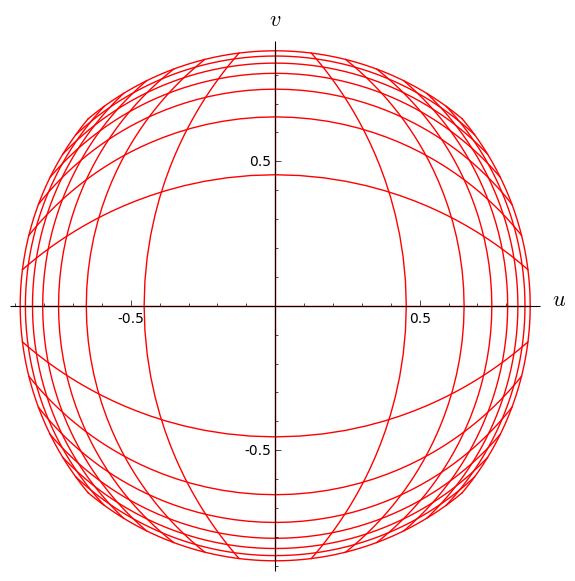

In [48]:
X_hyp.plot(X_Pdisk_cart, nb_values=15)

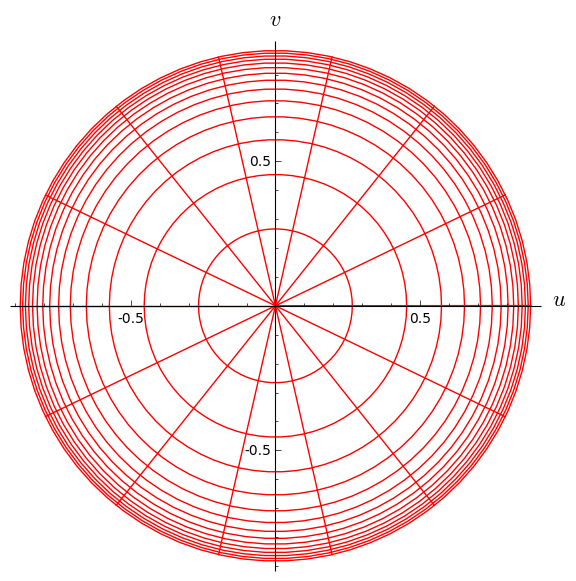

In [49]:
X_pol.plot(X_Pdisk_cart, nb_values=15)

### Metric tensor in Poincaré disk coordinates $(u,v)$

From now on, we are using the Poincaré disk chart $(\mathbb{H}^2,(u,v))$ as the default one on $\mathbb{H}^2$:

In [50]:
H2.set_default_chart(X_Pdisk_cart)
H2.set_default_frame(X_Pdisk_cart.frame())

In [51]:
g.display(X_hyp.frame())

g = (u^4 + v^4 + 2*(u^2 + 1)*v^2 - 2*u^2 + 1)/(u^4 + v^4 + 2*(u^2 + 1)*v^2 + 2*u^2 + 1) dX*dX - 4*u*v/(u^4 + v^4 + 2*(u^2 + 1)*v^2 + 2*u^2 + 1) dX*dY - 4*u*v/(u^4 + v^4 + 2*(u^2 + 1)*v^2 + 2*u^2 + 1) dY*dX + (u^4 + v^4 + 2*(u^2 - 1)*v^2 + 2*u^2 + 1)/(u^4 + v^4 + 2*(u^2 + 1)*v^2 + 2*u^2 + 1) dY*dY

In [52]:
g.display()

g = 4/(u^4 + v^4 + 2*(u^2 - 1)*v^2 - 2*u^2 + 1) du*du + 4/(u^4 + v^4 + 2*(u^2 - 1)*v^2 - 2*u^2 + 1) dv*dv

In [53]:
g[1,1].factor() ; g[2,2].factor()
g.display()

g = 4/(u^2 + v^2 - 1)^2 du*du + 4/(u^2 + v^2 - 1)^2 dv*dv

At this stage, 6 charts have been defined on the manifold $\mathbb{H}^2$:

In [54]:
H2.atlas()

[chart (H2, (X, Y)),
 chart (U, (X, Y)),
 chart (U, (r, ph)),
 chart (U, (R, ph)),
 chart (H2, (u, v)),
 chart (U, (u, v))]

In [55]:
H2.frames()

[coordinate frame (H2, (d/dX,d/dY)),
 coordinate frame (U, (d/dX,d/dY)),
 coordinate frame (U, (d/dr,d/dph)),
 coordinate frame (U, (d/dR,d/dph)),
 coordinate frame (H2, (d/du,d/dv)),
 coordinate frame (U, (d/du,d/dv))]

## Hemispherical model

The **hemispherical model of $\mathbb{H}^2$** is obtained by the inverse stereographic projection from the point $S = (0,0,-1)$ of the Poincaré disk to the unit sphere $X^2+Y^2+Z^2=1$. This induces a spherical coordinate chart on $U$:

In [56]:
X_spher.<th,ph> = U.chart(r'th:(0,pi/2):\theta ph:(0,2*pi):\varphi')
X_spher

chart (U, (th, ph))

From the stereographic projection from $S$, we obtain that
\begin{equation}
\sin\theta = \frac{2R}{1+R^2}
\end{equation}
Hence the transition map:

In [57]:
Pdisk_to_spher = X_Pdisk.transition_map(X_spher, [arcsin(2*R/(1+R^2)), ph])
Pdisk_to_spher

coordinate change from chart (U, (R, ph)) to chart (U, (th, ph))

In [58]:
Pdisk_to_spher(R,ph)

(arcsin(2*R/(R^2 + 1)), ph)

In [59]:
Pdisk_to_spher.set_inverse(sin(th)/(1+cos(th)), ph)

Check of the inverse coordinate transformation:
   R == R
   ph == ph
   th == th
   ph == ph


In the spherical coordinates $(\theta,\varphi)$, the metric takes the following form:

In [60]:
g.display(X_spher.frame(), X_spher)

g = cos(th)^(-2) dth*dth + sin(th)^2/cos(th)^2 dph*dph

The embedding of $\mathbb{H}^2$ in $\mathbb{R}^3$ associated with the hemispherical model is naturally:

In [65]:
Phi3 = H2.diff_mapping(R3, {(X_spher, X3): [sin(th)*cos(ph), sin(th)*sin(ph), cos(th)]},
                       name='Phi_3', latex_name=r'\Phi_3')
Phi3.display()

Phi_3: H2 --> R3
on U: (R, ph) |--> (X, Y, Z) = (2*R*cos(ph)/(R^2 + 1), 2*R*sin(ph)/(R^2 + 1), -(R^2 - 1)/(R^2 + 1))
on U: (th, ph) |--> (X, Y, Z) = (cos(ph)*sin(th), sin(ph)*sin(th), cos(th))

In [68]:
graph_spher = X_pol.plot(X3, mapping=Phi3, nb_values=15, color='orange')
show(graph_spher, aspect_ratio=1)

Graphics3d Object

## Poincaré half-plane model

The **Poincaré half-plane model of $\mathbb{H}^2$** is obtained by stereographic projection from the point $W=(-1,0,0)$ of the hemispherical model to the plane $X=1$. This induces a new coordinate chart on $\mathbb{H}^2$ by setting $(x,y)=(Y,Z)$ in the plane $X=1$:

In [61]:
X_hplane.<x,y> = H2.chart('x y:(0,+oo)')
X_hplane

chart (H2, (x, y))

The coordinate transformation $(\theta,\varphi)\rightarrow (x,y)$ is easily deduced from the stereographic projection from the point $W$:

In [62]:
spher_to_hplane = X_spher.transition_map(X_hplane, [2*sin(th)*sin(ph)/(1+sin(th)*cos(ph)),
                                                    2*cos(th)/(1+sin(th)*cos(ph))])
spher_to_hplane

coordinate change from chart (U, (th, ph)) to chart (U, (x, y))

In [63]:
spher_to_hplane(th,ph)

(2*sin(ph)*sin(th)/(cos(ph)*sin(th) + 1), 2*cos(th)/(cos(ph)*sin(th) + 1))

In [70]:
Pdisk_to_hplane = spher_to_hplane * Pdisk_to_spher
Pdisk_to_hplane

coordinate change from chart (U, (R, ph)) to chart (U, (x, y))

In [71]:
Pdisk_to_hplane(R,ph)

(4*R*sin(ph)/(R^2 + 2*R*cos(ph) + 1), -2*(R^2 - 1)/(R^2 + 2*R*cos(ph) + 1))

In [73]:
Pdisk_cart_to_hplane_U = Pdisk_to_hplane * Pdisk_to_Pdisk_cart.inverse()
Pdisk_cart_to_hplane_U

coordinate change from chart (U, (u, v)) to chart (U, (x, y))

In [74]:
Pdisk_cart_to_hplane_U(u,v)

(4*v/(u^2 + v^2 + 2*u + 1), -2*(u^2 + v^2 - 1)/(u^2 + v^2 + 2*u + 1))

Let us use the above formula to define the transition map $(u,v)\rightarrow (x,y)$ on the whole manifold $\mathbb{H}^2$ (and not only on $U$):

In [75]:
Pdisk_cart_to_hplane = X_Pdisk_cart.transition_map(X_hplane, Pdisk_cart_to_hplane_U(u,v))
Pdisk_cart_to_hplane

coordinate change from chart (H2, (u, v)) to chart (H2, (x, y))

In [76]:
Pdisk_cart_to_hplane(u,v)

(4*v/(u^2 + v^2 + 2*u + 1), -2*(u^2 + v^2 - 1)/(u^2 + v^2 + 2*u + 1))

In [78]:
Pdisk_cart_to_hplane.set_inverse((4-x^2-y^2)/(x^2+(2+y)^2), 4*x/(x^2+(2+y)^2))

Check of the inverse coordinate transformation:
   u == u
   v == v
   x == x
   y == y


In [79]:
Pdisk_cart_to_hplane.inverse()(x,y)

(-(x^2 + y^2 - 4)/(x^2 + y^2 + 4*y + 4), 4*x/(x^2 + y^2 + 4*y + 4))

Since the coordinates $(x,y)$ correspond to $(Y,Z)$ in the plane $X=1$, the embedding of $\mathbb{H}^2$ in $\mathbb{R}^3$ naturally associated with the Poincaré half-plane model is

In [80]:
Phi4 = H2.diff_mapping(R3, {(X_hplane, X3): [1, x, y]},
                       name='Phi_4', latex_name=r'\Phi_4')
Phi4.display()

Phi_4: H2 --> R3
   (u, v) |--> (X, Y, Z) = (1, 4*v/(u^2 + v^2 + 2*u + 1), -2*(u^2 + v^2 - 1)/(u^2 + v^2 + 2*u + 1))
   (x, y) |--> (X, Y, Z) = (1, x, y)

In [83]:
graph_hplane = X_Pdisk.plot(X3, mapping=Phi4.restrict(U), ranges={R: (0,0.8), ph:(0,2*pi)}, 
                            nb_values=15, color='brown')
show(graph_hplane, aspect_ratio=1)

Graphics3d Object

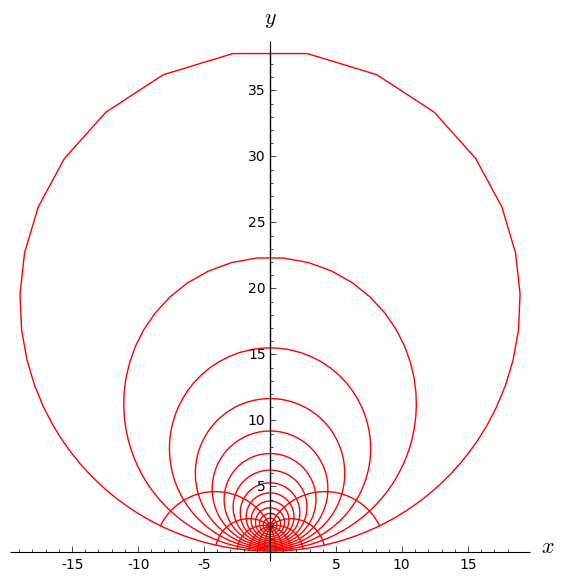

In [90]:
X_Pdisk.plot(X_hplane, ranges={R: (0,0.9)}, nb_values=15, plot_points=400)

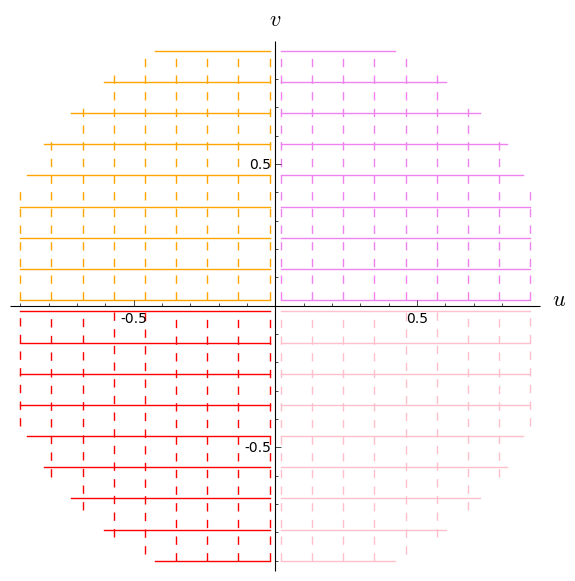

In [110]:
X_Pdisk_cart.plot(ranges={u: (-0.9, -0.02), v: (-0.9, -0.02)}, 
                  style={u: '-', v: '--'}) + \
X_Pdisk_cart.plot(ranges={u: (-0.9, -0.02), v: (0.02, 0.9)}, 
                  style={u: '-', v: '--'}, color='orange') + \
X_Pdisk_cart.plot(ranges={u: (0.02, 0.9), v: (-0.9, -0.02)}, 
                    style={u: '-', v: '--'}, color='pink') + \
X_Pdisk_cart.plot(ranges={u: (0.02, 0.9), v: (0.02, 0.9)}, 
                  style={u: '-', v: '--'}, color='violet')

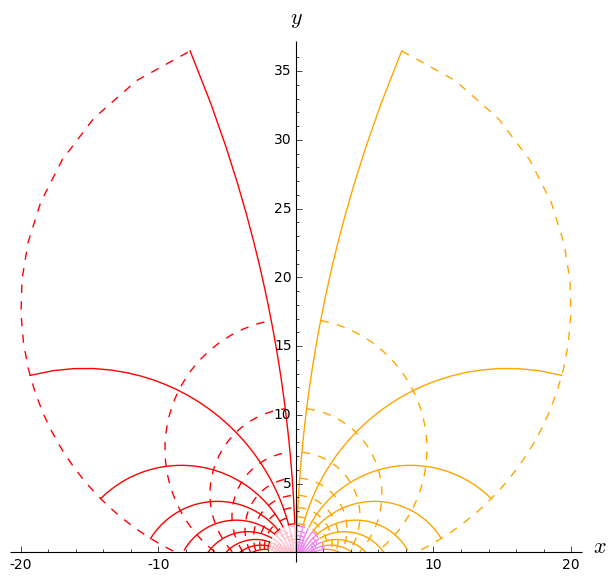

In [108]:
X_Pdisk_cart.plot(X_hplane, ranges={u: (-0.9, -0.02), v: (-0.9, -0.02)}, 
                  style={u: '-', v: '--'}) + \
X_Pdisk_cart.plot(X_hplane, ranges={u: (-0.9, -0.02), v: (0.02, 0.9)}, 
                  style={u: '-', v: '--'}, color='orange') + \
X_Pdisk_cart.plot(X_hplane, ranges={u: (0.02, 0.9), v: (-0.9, -0.02)}, 
                    style={u: '-', v: '--'}, color='pink') + \
X_Pdisk_cart.plot(X_hplane, ranges={u: (0.02, 0.9), v: (0.02, 0.9)}, 
                  style={u: '-', v: '--'}, color='violet')

In [92]:
hyp_to_hplane = Pdisk_cart_to_hplane * hyp_to_Pdisk_cart
hyp_to_hplane

coordinate change from chart (H2, (X, Y)) to chart (H2, (x, y))

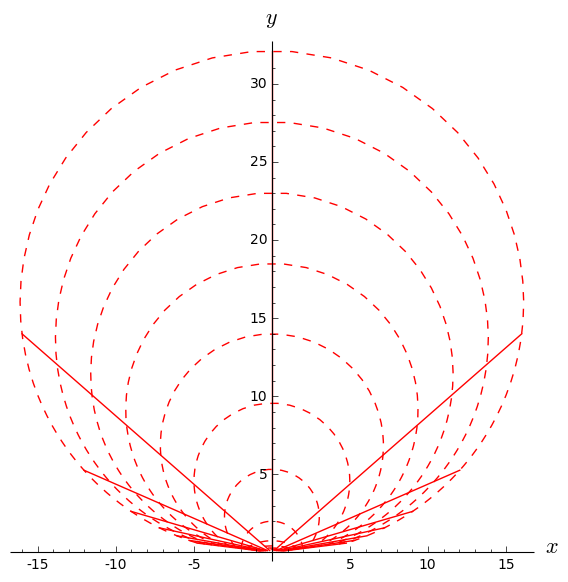

In [96]:
X_hyp.plot(X_hplane, nb_values=15, plot_points=200, style={X: '-', Y: '--'})

The expression of the metric tensor in the half-plane coordinates $(x,y)$ is

In [81]:
g.display(X_hplane.frame(), X_hplane)

g = y^(-2) dx*dx + y^(-2) dy*dy